Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 25088)          │     1,630,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 28, 28, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 28, 28, 16)     │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,255,233 (12.42 MB)

 Trainable params: 3,255,233 (12.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0677 - val_loss: 0.0319
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0274 - val_loss: 0.0258
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0240 - val_loss: 0.0236
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 0.1273 - val_loss: 0.1252
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1232 - val_loss: 0.1229
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1204 - val_loss: 0.1209
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.1172 - val_loss: 0.1182
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1144 - val_loss: 0.1178
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.1131 - val_loss: 0.1185
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.1120 - val_loss: 0.1179
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1109 - val_loss: 0.1181
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - 

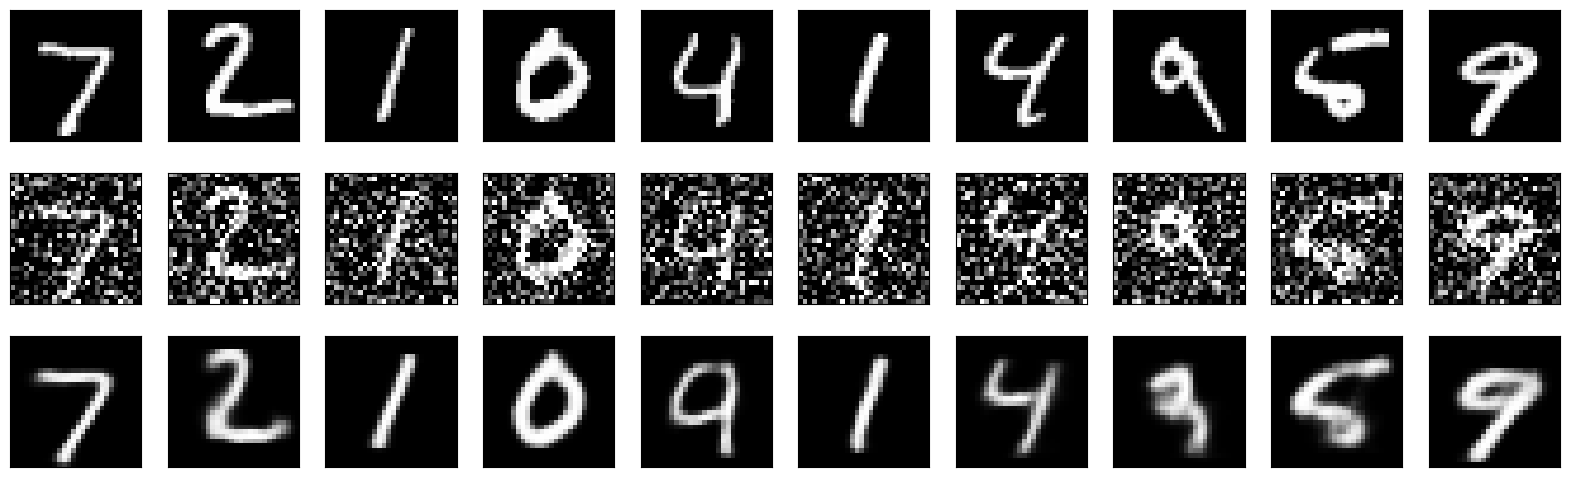

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Wyłączenie optymalizacji oneDNN
# oraz obniżenie poziomu logowania TensorFlow, by nie wyświetlać ostrzeżeń
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Wczytanie zestawu danych MNIST (obrazy cyfr)
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizacja pikseli
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Rozszerzenie wymiaru tak, aby dane miały kształt (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Dodaje szum do danych - losowa wartość z rozkładu normalnego 
# jest dodawana do każdego piksela z współczynnikiem 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Przycina wartości tak, by nadal mieściły się w zakresie [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Definicja architektury modelu
input_layer = Input(shape=(28, 28, 1))

# Warstwa konwolucyjna z 16 filtrami
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)

# Kolejna warstwa konwolucyjna z 32 filtrami
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

# Spłaszcza wyniki do wektora
x = Flatten()(x)

# Warstwa Dense (gęsta) z 64 neuronami
x = Dense(64, activation='relu')(x)

# Kolejna warstwa gęsta, której wyjście jest przekształcane z powrotem w obraz 28*28*32
x = Dense(28*28*32, activation='relu')(x)

# Reshape przywraca wymiary do (28, 28, 32)
x = Reshape((28, 28, 32))(x)

# Transponowana konwolucja (Conv2DTranspose) – odwrotność zwykłej konwolucji
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)

# Ostatnia warstwa ma 1 filtr i aktywację sigmoidalną,
# by wartość każdego piksela była w przedziale [0,1]
output_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Tworzy model
diffusion_model = Model(input_layer, output_layer)

# Kompilacja modelu: używa optymalizatora Adam i funkcji straty MSE (średni błąd kwadratowy)
diffusion_model.compile(optimizer='adam', loss='mean_squared_error')

# Wyświetlenie podsumowania warstw modelu
diffusion_model.summary()

# Przygotowanie danych w postaci pipeline’ów TensorFlow: cachowanie i prefetch 
# w celu przyspieszenia wczytywania
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_noisy, x_train))
train_dataset = train_dataset.cache().batch(64).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((x_test_noisy, x_test))
val_dataset = val_dataset.cache().batch(64).prefetch(tf.data.AUTOTUNE)

# Wczesne zatrzymanie (early stopping) – przerwanie treningu, jeśli 
# wskaźnik walidacyjny (val_loss) nie poprawia się przez pewien czas
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Trening modelu z użyciem wczesnego zatrzymania
diffusion_model.fit(
    train_dataset,
    epochs=3,
    shuffle=True,
    validation_data=val_dataset,
    callbacks=[early_stopping]
)

# Używa wytrenowanego modelu do przewidzenia (odszumienia) obrazów testowych
denoised_images = diffusion_model.predict(x_test_noisy)

# Wizualizacja wyników – porównanie oryginalnych, zaszumionych i odszumionych obrazów
n = 10  # Liczba cyfr do wyświetlenia
plt.figure(figsize=(20, 6))
for i in range(n):
    # Wyświetla oryginał
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Wyświetla zaszumiony obraz
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Wyświetla odszumiony obraz
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
